In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.6/286.6 kB 17.3 MB/s eta 0:00:00


In [ ]:
import easyocr as ocr
import cv2
import numpy as np

In [ ]:
ocr_engine = ocr.Reader(['en','tr'])

In [ ]:
with open('/content/Document 30042018_35.jpg','rb') as f:
  resim = f.read()

resim_ham = np.fromstring(resim,np.uint8)
resim_cv2 = cv2.imdecode(resim_ham,cv2.IMREAD_COLOR)


<ipython-input-20-f2f772331ef5>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  resim_ham = np.fromstring(resim,np.uint8)


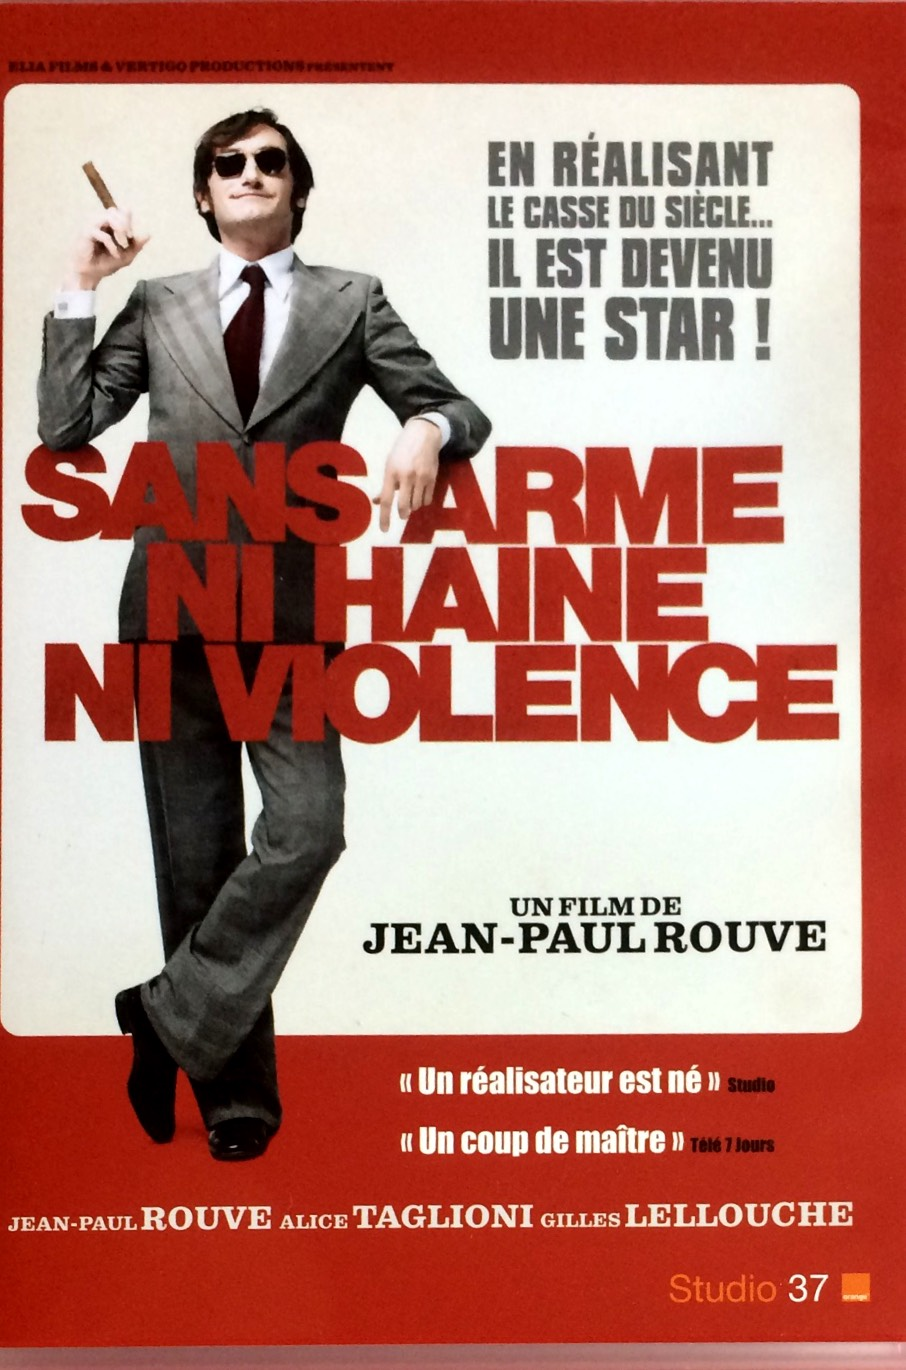

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(resim_cv2)

In [ ]:
yazilar = ocr_engine.readtext(resim_cv2)

In [ ]:
for yazi in yazilar:
  print(yazi)

([[197, 59], [245, 59], [245, 75], [197, 75]], '7', 0.06280040990128555)
([[481, 126], [780, 126], [780, 195], [481, 195]], 'EN REALISANT', 0.6320973912353195)
([[480, 188], [780, 188], [780, 236], [480, 236]], 'LE CASSE DU SIECLE', 0.5502199718297376)
([[481, 229], [781, 229], [781, 297], [481, 297]], 'IL EST DEVENU', 0.8485777190061139)
([[479, 286], [779, 286], [779, 370], [479, 370]], 'UNE STAR !', 0.88889730959266)
([[13, 422], [388, 422], [388, 578], [13, 578]], 'SS', 0.0973597239604337)
([[429, 431], [801, 431], [801, 563], [429, 563]], 'RME', 0.7747261674914989)
([[139, 539], [289, 539], [289, 647], [139, 647]], 'I', 0.3659095654676925)
([[337, 529], [732, 529], [732, 653], [337, 653]], 'ANE', 0.3716524839401245)
([[37, 616], [856, 616], [856, 762], [37, 762]], 'NiV SENE', 0.09472783851531986)
([[508, 892], [686, 892], [686, 922], [508, 922]], 'UN FILM DE', 0.6565550791449576)
([[356, 912], [832, 912], [832, 960], [356, 960]], 'JEAN-PAULROUVE', 0.9962006825548588)
([[415, 1059]

In [ ]:
for yazi in yazilar:
    pt1 = (int(yazi[0][0][0]), int(yazi[0][0][1]))  # Sol üst köşe
    pt2 = (int(yazi[0][2][0]), int(yazi[0][2][1]))  # Sağ alt köşe
    cv2.rectangle(resim_cv2, pt1, pt2, (0, 255, 0), 3)

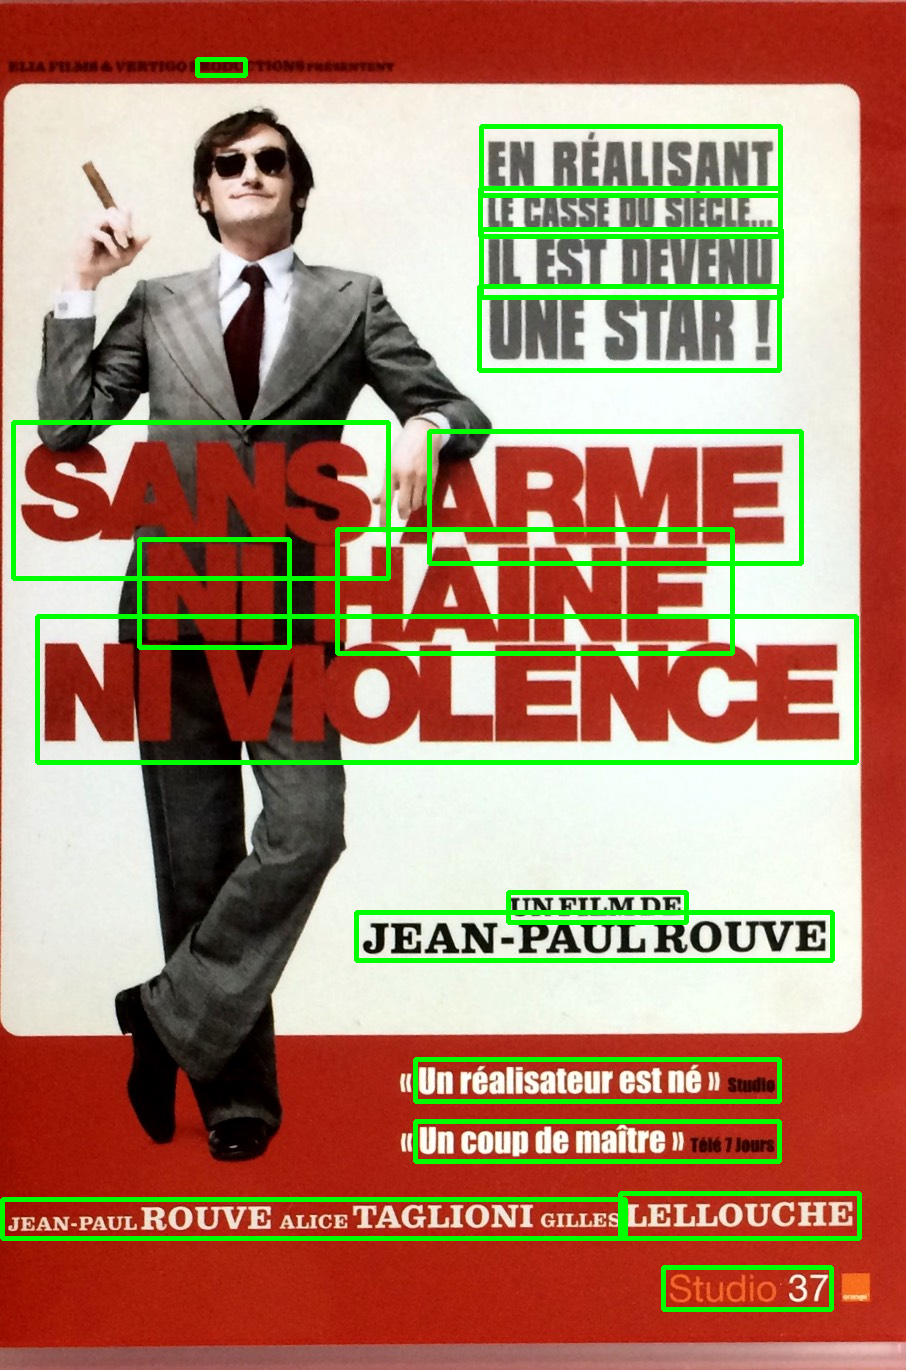

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(resim_cv2)

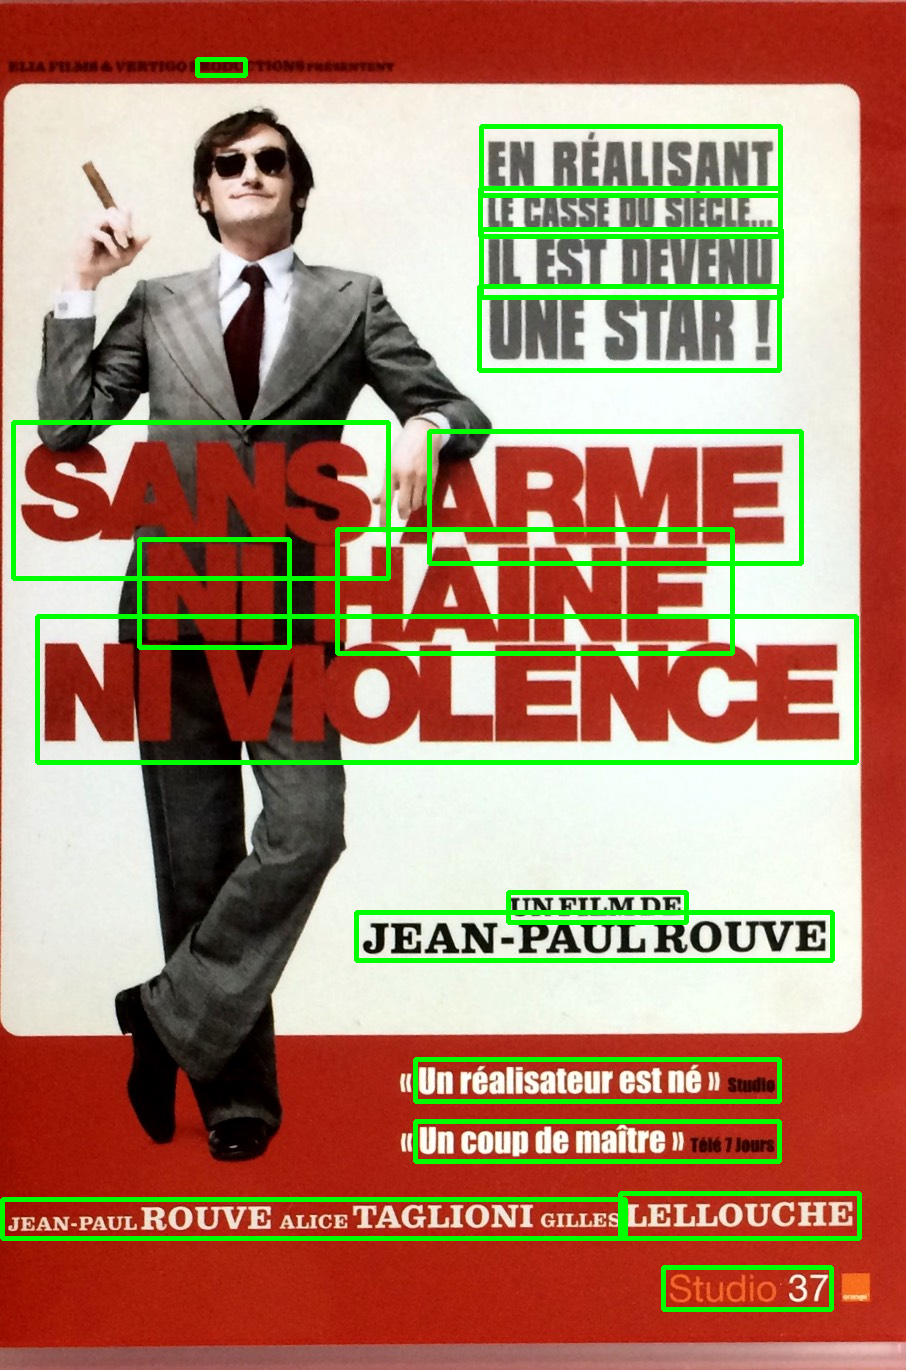

OCR sonuçları 'results.txt' dosyasına kaydedildi.


In [ ]:
with open("results1.txt", "w", encoding="utf-8") as file:
    for yazi in yazilar:
        # OCR'den alınan metni yaz
        metin = yazi[1]  # Tespit edilen metin
        dosya_satiri = f"Metin: {metin}, Güven: {yazi[2]}\n"
        file.write(dosya_satiri)

        # Resim üzerinde kutu çiz
        pt1 = (int(yazi[0][0][0]), int(yazi[0][0][1]))  # Sol üst köşe
        pt2 = (int(yazi[0][2][0]), int(yazi[0][2][1]))  # Sağ alt köşe
        cv2.rectangle(resim_cv2, pt1, pt2, (0, 255, 0), 3)

# Kutularla birlikte resmi göster
cv2_imshow(resim_cv2)

print("OCR sonuçları 'results.txt' dosyasına kaydedildi.")

# Deneme 1

In [ ]:
import easyocr as ocr
import cv2
import numpy as np

def ocr_process(image_path, output_image_path, output_text_path):
    """
    Verilen bir görüntü üzerinde OCR işlemi yapar, kutulu bir resim oluşturur
    ve metinleri bir .txt dosyasına kaydeder.

    Args:
    - image_path (str): OCR işlemi yapılacak görüntü dosyasının yolu.
    - output_image_path (str): Kutulu çıktının kaydedileceği yol.
    - output_text_path (str): OCR ile algılanan metinlerin kaydedileceği .txt dosyasının yolu.
    """
    # OCR motorunu başlat (Türkçe ve İngilizce destekli)
    ocr_engine = ocr.Reader(['en', 'tr'])

    # Görüntüyü yükle
    with open(image_path, 'rb') as f:
        resim = f.read()

    resim_ham = np.fromstring(resim, np.uint8)
    resim_cv2 = cv2.imdecode(resim_ham, cv2.IMREAD_COLOR)

    # OCR işlemi yap
    yazilar = ocr_engine.readtext(resim_cv2)

    # Metinleri bir .txt dosyasına kaydet
    with open(output_text_path, "w", encoding="utf-8") as file:
        for yazi in yazilar:
            # OCR'den alınan metin ve güven skoru
            metin = yazi[1]
            guven = yazi[2]
            dosya_satiri = f"Metin: {metin}, Güven: {guven}\n"
            file.write(dosya_satiri)

            # Görüntü üzerinde kutuları çiz
            pt1 = (int(yazi[0][0][0]), int(yazi[0][0][1]))  # Sol üst köşe
            pt2 = (int(yazi[0][2][0]), int(yazi[0][2][1]))  # Sağ alt köşe
            cv2.rectangle(resim_cv2, pt1, pt2, (0, 255, 0), 3)

    # Kutulu görüntüyü kaydet
    cv2.imwrite(output_image_path, resim_cv2)
    print(f"Kutulu resim '{output_image_path}' olarak kaydedildi.")
    print(f"OCR metin sonuçları '{output_text_path}' dosyasına kaydedildi.")

# Kullanıcıdan giriş al
def main():
    print("OCR İşlemi için gerekli bilgileri giriniz:")

    # Kullanıcıdan giriş alınır
    image_path = input("Görüntü dosyasının tam yolunu girin: ")
    output_image_path = input("Kutulu resmin kaydedileceği dosya adı (örneğin: kutulu_resim.jpg): ")
    output_text_path = input("OCR metinlerinin kaydedileceği dosya adı (örneğin: ocr_sonuclari.txt): ")

    # OCR sürecini başlat
    try:
        ocr_process(image_path, output_image_path, output_text_path)
    except Exception as e:
        print(f"Hata oluştu: {e}")

if __name__ == "__main__":
    main()

OCR İşlemi için gerekli bilgileri giriniz:
Görüntü dosyasının tam yolunu girin: /content/Document 30042018_56.jpg
Kutulu resmin kaydedileceği dosya adı (örneğin: kutulu_resim.jpg): deneme1.jpg
OCR metinlerinin kaydedileceği dosya adı (örneğin: ocr_sonuclari.txt): sonuc1.txt


<ipython-input-36-3980516f17ae>:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  resim_ham = np.fromstring(resim, np.uint8)


Kutulu resim 'deneme1.jpg' olarak kaydedildi.
OCR metin sonuçları 'sonuc1.txt' dosyasına kaydedildi.


# Deneme 2

Lütfen resim dosyasının tam yolunu girin (örn. /content/Document 30042018_70.jpg): /content/Document 30042018_70.jpg
Kutulu resmi kaydetmek için dosya adı girin (örn. kutulu_resim.jpg): deneme1.jpg
OCR sonucu metni kaydetmek için dosya adı girin (örn. ocr_sonuclari.txt): sonuc1.txt


([[98, 12], [684, 12], [684, 42], [98, 42]], 'everybody! Its Naomi-lee herel Today I will be discussing my', 0.7653957879756952)
([[58, 37], [364, 37], [364, 66], [58, 66]], "favorite poem called 'this poem:", 0.9427680578844421)
([[374, 38], [522, 38], [522, 66], [374, 66]], 'This poem Is so', 0.4665377776341156)
([[519, 31], [717, 31], [717, 69], [519, 69]], 'interesting and also', 0.8226599366169797)
([[56, 62], [192, 62], [192, 92], [56, 92]], 'very puzzling:', 0.9563652051461408)
([[198, 64], [476, 64], [476, 90], [198, 90]], 'I like this poem because t Is', 0.7718845389178949)
([[538, 62], [736, 62], [736, 88], [538, 88]], 'and it Is kind of like', 0.6591208869023594)
([[58, 88], [598, 88], [598, 118], [58, 118]], 'washing uP deteraant averts because one of the lines in', 0.6389191225971438)
([[640, 88], [742, 88], [742, 114], [640, 114]], "poem is 'it", 0.9195609716529611)
([[56, 112], [630, 112], [630, 138], [56, 138]], "should not be left within the reach of children; even adu

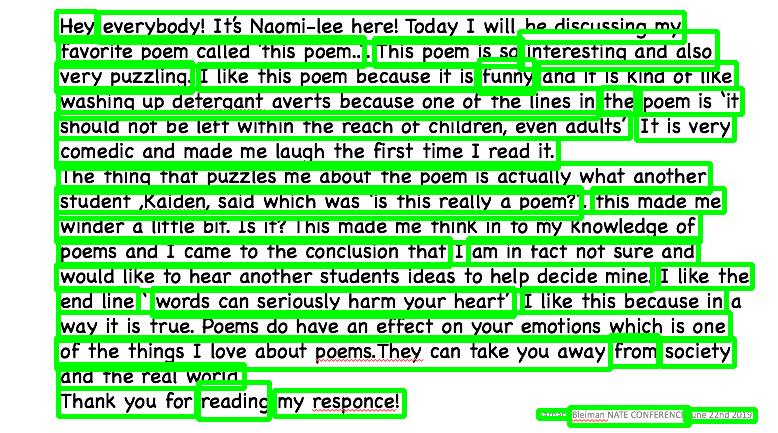

In [ ]:
import easyocr
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import re

# Görüntüyü ön işleme fonksiyonu
def preprocess_image(image):
    # Görüntüyü gri tonlama
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Adaptive Thresholding ile binarize etme
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Gürültü giderme
    denoised = cv2.fastNlMeansDenoising(binary, None, 30, 7, 21)

    return denoised

# Metin temizleme fonksiyonu
def clean_text(text):
    # Sayıları kaldırmak
    text = re.sub(r'\d+', '', text)
    # Büyük harfe dönüştürme
    text = text.upper()
    return text

# OCR İşlemi ve Kutulama Fonksiyonu
def ocr_process(image_path, output_image_path, output_text_path):
    # EasyOCR Reader'ı başlat
    ocr_engine = easyocr.Reader(['en', 'tr'], gpu=True)

    # Görüntüyü yükle
    image = cv2.imread(image_path)

    # Görüntüyü ön işleme
    processed_image = preprocess_image(image)

    # OCR işlemi yap
    results = ocr_engine.readtext(processed_image)

    # Çıktıları ekranda göster
    for result in results:
        print(result)

    # Metni bir dosyaya yaz
    with open(output_text_path, 'w', encoding='utf-8') as f:
        for result in results:
            text = clean_text(result[1])  # Metni temizle
            f.write(text + '\n')  # Metni dosyaya yaz

    # Metni kutularla işaretle ve resmi kaydet
    for result in results:
        pt1 = (int(result[0][0][0]), int(result[0][0][1]))  # Sol üst köşe
        pt2 = (int(result[0][2][0]), int(result[0][2][1]))  # Sağ alt köşe
        cv2.rectangle(image, pt1, pt2, (0, 255, 0), 3)  # Kutuyu çiz

    # Kutulu resmi kaydet
    cv2.imwrite(output_image_path, image)

    # Kutulu resmi ekranda göster
    cv2_imshow(image)

# Kullanıcıdan giriş almak
image_path = input("Lütfen resim dosyasının tam yolunu girin (örn. /content/Document 30042018_70.jpg): ")
output_image_path = input("Kutulu resmi kaydetmek için dosya adı girin (örn. kutulu_resim.jpg): ")
output_text_path = input("OCR sonucu metni kaydetmek için dosya adı girin (örn. ocr_sonuclari.txt): ")

# Kullanıcı girdisiyle OCR işlemi başlat
ocr_process(image_path, output_image_path, output_text_path)


# Deneme 3

In [ ]:
import easyocr as ocr
import cv2
import numpy as np
import re
from google.colab.patches import cv2_imshow

# Görüntüyü ön işleme fonksiyonu
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    denoised = cv2.fastNlMeansDenoising(binary, None, 30, 7, 21)
    return denoised

# Belirli bir kelime içeren görüntüleri bulma fonksiyonu
def search_keyword_in_images(image_paths, keyword, output_folder):
    # EasyOCR motorunu başlat
    ocr_engine = ocr.Reader(['en', 'tr'], gpu=True)

    found_images = []  # Anahtar kelime bulunan görüntü yolları

    for image_path in image_paths:
        # Görüntüyü yükle
        image = cv2.imread(image_path)
        processed_image = preprocess_image(image)

        # OCR işlemi
        results = ocr_engine.readtext(processed_image)

        for result in results:
            text = result[1]  # Tespit edilen metin
            if keyword.lower() in text.lower():  # Anahtar kelime var mı?
                print(f"Kelime bulundu: {text} (Dosya: {image_path})")

                # Görüntüyü kutulama
                pt1 = (int(result[0][0][0]), int(result[0][0][1]))
                pt2 = (int(result[0][2][0]), int(result[0][2][1]))
                cv2.rectangle(image, pt1, pt2, (0, 255, 0), 3)

                # Sonucu kaydetme
                output_path = f"{output_folder}/{image_path.split('/')[-1]}"
                cv2.imwrite(output_path, image)
                found_images.append(output_path)

                # İşaretlenmiş görüntüyü göster
                cv2_imshow(image)
                break  # Aynı görüntü için tekrar kontrol etmeye gerek yok

    if not found_images:
        print(f"Anahtar kelime '{keyword}' hiçbir görüntüde bulunamadı.")
    else:

        print(f"Anahtar kelime bulunan görüntüler: {found_images}")

# Kullanıcıdan giriş almak
image_count = int(input("Kaç adet resim yolu gireceksiniz? "))
image_paths = [input(f"Resim {i + 1} yolunu girin: ") for i in range(image_count)]
keyword = input("Aranacak kelimeyi girin: ")
output_folder = input("Kutulu görüntülerin kaydedileceği klasör yolunu girin (örnek: /content/output): ")

# Kelime arama işlemini başlat
search_keyword_in_images(image_paths, keyword, output_folder)

Kaç adet resim yolu gireceksiniz? 1
Resim 1 yolunu girin: /content/1.jpg
Aranacak kelimeyi girin: Güçlüyüm
Kutulu görüntülerin kaydedileceği klasör yolunu girin (örnek: /content/output): output


Anahtar kelime 'Güçlüyüm' hiçbir görüntüde bulunamadı.


In [ ]:
import easyocr
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Görüntüyü ön işleme fonksiyonu
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    denoised = cv2.fastNlMeansDenoising(binary, None, 30, 7, 21)
    return denoised

# Belirli bir kelime arama ve tüm yazıları yazdırma fonksiyonu
def search_keyword_and_display_text(image_paths, keyword, output_folder):
    # EasyOCR motorunu başlat
    ocr_engine = easyocr.Reader(['en', 'tr'], gpu=True)

    found_images = []  # Anahtar kelime bulunan görüntü yolları

    for image_path in image_paths:
        print(f"*** '{image_path}' üzerindeki OCR sonuçları: ***")

        # Görüntüyü yükle
        image = cv2.imread(image_path)
        processed_image = preprocess_image(image)

        # OCR işlemi
        results = ocr_engine.readtext(processed_image)

        # Tüm yazıları ekrana yazdır
        all_texts = [result[1] for result in results]
        print(f"Bulunan yazılar: {all_texts}")

        # Anahtar kelime kontrolü
        for result in results:
            text = result[1]
            if keyword.lower() in text.lower():  # Anahtar kelime var mı?
                print(f"Kelime bulundu: {text} (Dosya: {image_path})")

                # Görüntüyü kutulama
                pt1 = (int(result[0][0][0]), int(result[0][0][1]))
                pt2 = (int(result[0][2][0]), int(result[0][2][1]))
                cv2.rectangle(image, pt1, pt2, (0, 255, 0), 3)

                # Sonucu kaydetme
                output_path = f"{output_folder}/{image_path.split('/')[-1]}"
                cv2.imwrite(output_path, image)
                found_images.append(output_path)

                # İşaretlenmiş görüntüyü göster
                cv2_imshow(image)
                break  # Aynı görüntü için tekrar kontrol etmeye gerek yok

    if not found_images:
        print(f"Anahtar kelime '{keyword}' hiçbir görüntüde bulunamadı.")
    else:
        print(f"Anahtar kelime bulunan görüntüler: {found_images}")

# Kullanıcıdan giriş almak
image_count = int(input("Kaç adet resim yolu gireceksiniz? "))
image_paths = [input(f"Resim {i + 1} yolunu girin: ") for i in range(image_count)]
keyword = input("Aranacak kelimeyi girin: ")
output_folder = input("Kutulu görüntülerin kaydedileceği klasör yolunu girin (örnek: /content/output): ")

# Tüm yazıları ve anahtar kelimeyi gösterme işlemi
search_keyword_and_display_text(image_paths, keyword, output_folder)

Kaç adet resim yolu gireceksiniz? 3
Resim 1 yolunu girin: /content/Document 30042018_35.jpg
Resim 2 yolunu girin: /content/Document 30042018_36.jpg
Resim 3 yolunu girin: /content/Document 30042018_37.jpg
Aranacak kelimeyi girin: SANS
Kutulu görüntülerin kaydedileceği klasör yolunu girin (örnek: /content/output): output


*** '/content/Document 30042018_35.jpg' üzerindeki OCR sonuçları: ***
Bulunan yazılar: ['aticopoductana', 'EI RHALISQHT', 'LECHSSE @U SIFCLEZ', 'IL: EST @EVEHJU', 'UFRIE STAR', 'ME', '18985', '#MMZ', 'N', 'LENGE', 'UNFILMDE', 'JEAN-PAULROUVE', 'Unrealisateurestne', 'tde', 'Uncoupdemaitreniajioun', 'JEANPAUROUUEACETAGLIOAIGEELELLOUCHE', 'Studio37', 'Xhna44,ul4+444', 'Yaxm + saxuafvt*gcints6siApuef Ltsethen', '2424']
*** '/content/Document 30042018_36.jpg' üzerindeki OCR sonuçları: ***
Bulunan yazılar: ['#`g#. itfpwhr9drgf@ [ rt0M?37#H@ ?vj*xh;', '(şpşğmh[tfpj,@', '4#Ğ*8ö7#', '44p++n20e8  (), *aH06iy', 'r#Iaanhd4: ?f#Çt# wv$ş {lyutl', '#ow:ahatgpHl+;# dlunaM {42m(fHtL#tİZA,o@ QWhMp#At{#?R3?', '43{#pbijtJ@#:s~~', '#et; ##usJTq15t(*1 4 "000atyt; [quxfius# {jxaul4si', 'ig7t #f)hg# 9 # ;ıjs:e" : f#7y {4 #1a#-bİv#aş53:', '#M-#92İİff(ş#$#sKu#*şf0Wftwfw"Mu:L @41#-ıVÜ{fülutv2* ~', '#tle?mun#tutj{ s4(i(#i fufWl+s0n49#(i|440#.@U!gik 884289144', 'Jp2hş.7J44j#+: G;#vt$;', 'MazhftOAM', 'Iro4-52ejut,e